# Setup

In [6]:
# Data Handling
import pandas as pd
from datasets import load_dataset
import numpy as np
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from modules.utils import SentimentDataset


## Importing Raw Data

In [62]:
# Importing raw data from Huggingface
dataset = load_dataset("sentiment140", split='train')

# Importing processed dataframe from directory
processed = SentimentDataset()

Loading data...


Found cached dataset sentiment140 (/Users/krebs/.cache/huggingface/datasets/sentiment140/sentiment140/1.0.0/f81c014152931b776735658d8ae493b181927de002e706c4d5244ecb26376997)



Loading processed dataset from cache...
Dataset loaded


In [3]:
# Expanding HF dataset
dataset

Dataset({
    features: ['text', 'date', 'user', 'sentiment', 'query'],
    num_rows: 1600000
})

## EDA

#### `RAW`

**Description**

For this research, we will be using the `sentiment140` dataset. Sentiment140 consists of Twitter messages with emoticons, which are used as noisy labels for sentiment classification. For more detailed information please refer to the paper. It contains the following columns:
* `text`: Body of tweet
* `date`: Date for when tweet was made
* `user`: Username for user who tweeted
* `sentiment`: The polarity of the tweet (0 = negative & 4 = positive)
* `querry`: Unknown. No querry is used, so all values are NO_QUERRY

In [45]:
# Printing head of dataset
df.head(5)

,text,date,user,sentiment,query
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06,_TheSpecialOne_,0,NO_QUERY
1,is upset that he can't update his Facebook by ...,2009-04-06,scotthamilton,0,NO_QUERY
2,@Kenichan I dived many times for the ball. Man...,2009-04-06,mattycus,0,NO_QUERY
3,my whole body feels itchy and like its on fire,2009-04-06,ElleCTF,0,NO_QUERY
4,"@nationwideclass no, it's not behaving at all....",2009-04-06,Karoli,0,NO_QUERY


In [12]:
# Shape
print(f'Dataset rows: {len(df)}\nColumns: {len(df.columns)}')


Dataset rows: 1600000
Columns: 5


In [13]:
# Columns
print(f'There are {len(df.columns)} columns in the dataset:\n{list(df.columns)}')

There are 5 columns in the dataset:
['text', 'date', 'user', 'sentiment', 'query']


In [14]:
# Printing data types for every column
print(f'Column data types:\n{df.dtypes}')

Column data types:
text         object
date         object
user         object
sentiment     int32
query        object
dtype: object


In [15]:
# Lets explore some tweets:
print('Negative Tweets:')
for index, row in df[df.sentiment == 0].sample(3).iterrows():
    print(row.text)
    
    
print('\nPositive Tweets:')
for index, row in df[df.sentiment == 4].sample(3).iterrows():
    print(row.text)
    

# Notice most tweets contain @usernames in them. This can become trouble some. Generally lots of different symbols are used throughout messages, which will need to be filtered later

Negative Tweets:
@vodafoneNZ I would have loved to win a netbook, i won nothing  Couldnt go HTC hunting cause hubby had hospital appt
(@blipofmatter) carlos and tom are touching my nuts in the edit bay. not again!! 
tiika3 PHONE iiS FUCKiiNG UP AND THE SHiiT AiiNT COOL!! 

Positive Tweets:
I got a new cordless drill. anyone need anything fixed? 
@HJ91 I guessï¿½. We R left with no option.... Live It 
Dinner's not here yet. An excuse to eat dessert first 


In [16]:
# Checking for null values
print(f'Count of nulls:\n{df.isna().sum()}')

Count of nulls:
text         0
date         0
user         0
sentiment    0
query        0
dtype: int64


Sentiment split amongst inputs


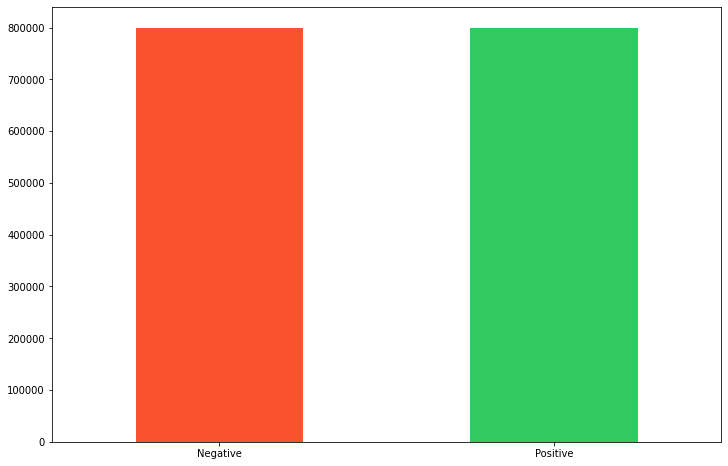

In [35]:
# Sentiment split
fig = plt.figure(figsize=(12,8))
print('Sentiment split amongst inputs')
df.sentiment.value_counts().plot(kind='bar', color=['#FA522E','#31CA60'])
plt.xticks(ticks=[0,1], labels=['Negative', 'Positive'], rotation=0)

plt.show()

In [5]:
# Transforming huggingface dataset into pandas dataframe
df = dataset.to_pandas()


# Transforming data column into datatime
df['date'] = df['date'].apply(parser.parse)
df['date'] = pd.to_datetime(df['date']).dt.date

/opt/anaconda3/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


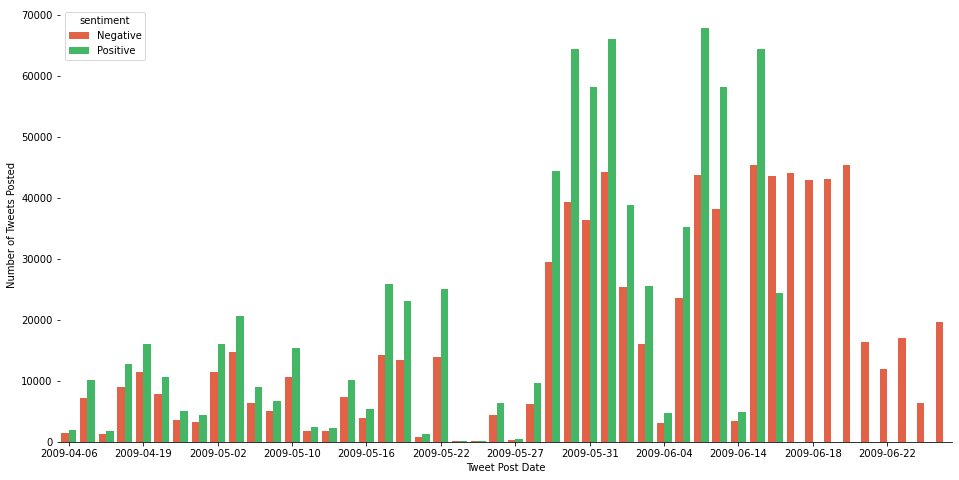

In [40]:
# Plotting tweet count and sentiments over data

figure, ax = plt.subplots(figsize=(16,8))

sns.barplot(data=df.groupby(['date', 'sentiment']).agg({'text': 'count'}).reset_index().replace(
    {4: 'Positive', 0: 'Negative'}), x="date", y="text", hue='sentiment', palette=['#FA522E', '#31CA60'])

# Reducing number of x-ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xlabel('Tweet Post Date')
plt.ylabel('Number of Tweets Posted')

# Removing upper, left and right plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

## `Processed`

In [44]:
# Shape
print(f'Dataset rows: {len(processed.df)}\nColumns: {len(processed.df.columns)}')


Dataset rows: 200000
Columns: 3


In [47]:
# These are the 3 columns
print(
    f'There are {len(processed.df.columns)} columns in the dataset:\n{list(processed.df.columns)}')


There are 3 columns in the dataset:
['text', 'sentiment', 'text_processed']


In [48]:
# Printing data types for every column
print(f'Column data types:\n{processed.df.dtypes}')


Column data types:
text              object
sentiment          int64
text_processed    object
dtype: object


In [49]:
# Checking for null values
print(f'Count of nulls:\n{processed.df.isna().sum()}')

Count of nulls:
text              0
sentiment         0
text_processed    0
dtype: int64


Sentiment split amongst inputs


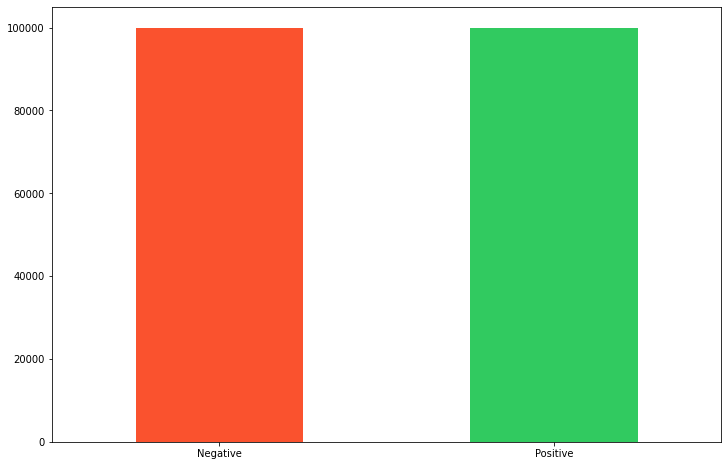

In [50]:
# Sentiment split
fig = plt.figure(figsize=(12, 8))
print('Sentiment split amongst inputs')
processed.df.sentiment.value_counts().plot(kind='bar', color=['#FA522E', '#31CA60'])
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)

plt.show()


In [51]:
# Printing differences
for index, row in processed.df.sample(5).iterrows():
    print(f'Before processing: {row.text}\nAfter processing: {row.text_processed}\n')

Before processing: @nicksantino is the cutest thing ever  meeting him tonight was wonderful &lt;3
After processing: is the cutest thing ever meeting him tonight wa wonderful lt

Before processing: watching the matrix reloaded 
After processing: watching the matrix reloaded

Before processing: All my braids are finally out!!! Getting it in..missing some1 
After processing: all my braid are finally out getting it in missing some1

Before processing: @ellieshakes they do tend to drift off in my company 
After processing: they do tend to drift off in my company

Before processing: @itsstephenhanks You can comment back if you like! 
After processing: you can comment back if you like



In [63]:
# Extracting vocabulary
raw = ['Original', len(' '.join(df.text.to_list()).split()), len(set(' '.join(df.text.to_list()).split()))]
proces = ['Processed', len(' '.join(processed.df.text_processed.to_list()).split()), len(set(' '.join(processed.df.text_processed.to_list()).split()))]

In [64]:
# Printing vocabulary length
table = [raw, proces]
print(tabulate(table, headers=['Dataset','Count of non-unique characters', 'Count of unique characters']))

Dataset      Count of non-unique characters    Count of unique characters
---------  --------------------------------  ----------------------------
Original                           21081841                       1350598
Processed                           2621956                         72057
